In [4]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merged = pd.merge(mouse_data, clinical_data, on="Mouse ID")

# Display the data table for preview
merged.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean = merged.groupby(['Drug','Timepoint'])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_df=pd.DataFrame(mean).reset_index()

# Preview DataFrame
mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [7]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem = merged.groupby(['Drug','Timepoint'])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
sem_df=pd.DataFrame(sem).reset_index()

# Preview DataFrame
sem_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [8]:
# Minor Data Munging to Re-Format the Data Frames
re_mean = mean_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']
re_sem = sem_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
# Preview that Reformatting worked
re_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


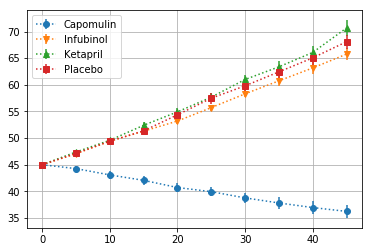

In [6]:
# Generate the Plot (with Error Bars)
x_axis = merged["Timepoint"].unique()

fig, ax = plt.subplots()
ax.errorbar(x_axis, re_mean["Capomulin"], re_sem["Capomulin"],fmt="o",ls=':')
ax.errorbar(x_axis, re_mean["Infubinol"], re_sem["Infubinol"], fmt="v",ls=':')
ax.errorbar(x_axis, re_mean["Ketapril"], re_sem["Ketapril"], fmt="^",ls=':')
ax.errorbar(x_axis, re_mean["Placebo"], re_sem["Placebo"], fmt="s",ls=':')

plt.legend(loc="best")
plt.grid()

# Save the Figure
plt.savefig("tumor.png")

In [6]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met = merged.groupby(['Drug','Timepoint'])["Metastatic Sites"].mean()

# Convert to DataFrame
met_mean = pd.DataFrame(mean_met)

# Preview DataFrame
met_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met = merged.groupby(['Drug','Timepoint'])["Metastatic Sites"].sem()

# Convert to DataFrame
met_sem = pd.DataFrame(sem_met)

# Preview DataFrame
met_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
reset_mean=met_mean.reset_index()
reset_sem=met_sem.reset_index()
re_mean = reset_mean.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
re_sem = reset_sem.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
re_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


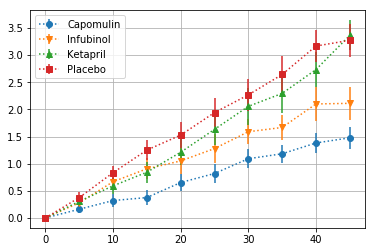

In [10]:
# Generate the Plot (with Error Bars)
x_axis = merged["Timepoint"].unique()

fig, ax = plt.subplots()
ax.errorbar(x_axis, re_mean["Capomulin"], re_sem["Capomulin"],fmt="o",ls=':')
ax.errorbar(x_axis, re_mean["Infubinol"], re_sem["Infubinol"], fmt="v",ls=':')
ax.errorbar(x_axis, re_mean["Ketapril"], re_sem["Ketapril"], fmt="^",ls=':')
ax.errorbar(x_axis, re_mean["Placebo"], re_sem["Placebo"], fmt="s",ls=':')

plt.legend(loc="best")
plt.grid()

# Save the Figure
plt.savefig("meta.png")

# Show the Figure
plt.show()

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = merged.groupby(['Drug','Timepoint'])["Mouse ID"].count()

# Convert to DataFrame
mice_count_df=pd.DataFrame(mice_count)
mice_count_df=mice_count_df.reset_index()

# Preview DataFrame
mice_count_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_p = mice_count_df.pivot(index='Timepoint',columns='Drug',values='Mouse ID')

# Preview the Data Frame
mice_count_p.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


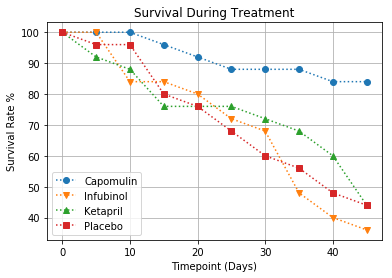

In [13]:
# Generate the Plot (Accounting for percentages)
x_axis = merged["Timepoint"].unique()

fig, ax = plt.subplots()
ax.errorbar(x_axis, (mice_count_p["Capomulin"]/mice_count_p["Capomulin"].max()*100),fmt="o",ls=':')
ax.errorbar(x_axis, (mice_count_p["Infubinol"]/mice_count_p["Infubinol"].max()*100),fmt="v",ls=':')
ax.errorbar(x_axis, (mice_count_p["Ketapril"]/mice_count_p["Ketapril"].max()*100),fmt="^",ls=':')
ax.errorbar(x_axis, (mice_count_p["Placebo"]/mice_count_p["Placebo"].max()*100),fmt="s",ls=':')


plt.grid()
plt.legend(loc="best")
plt.title("Survival During Treatment")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Survival Rate %")

# Save the Figure
plt.savefig('Survival.png')

# Show the Figure
plt.show()

## Summary Bar Graph

In [9]:
# Calculate the percent changes for each drug
drug_list=re_mean.keys()
prc_change=(re_mean.loc[45,drug_list]-re_mean.loc[0,drug_list])/re_mean.loc[0,drug_list]*100

# Display the data to confirm
prc_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

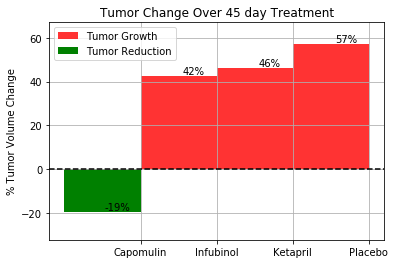

<Figure size 7200x72 with 0 Axes>

In [10]:
# Store all Relevant Percent Changes into a Tuple
drug_list=['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
drug_tuple=tuple(drug_list)
prc_change_tuple=tuple(prc_change)
objects = (drug_tuple)
y_pos = np.arange(len(objects))

# Splice the data between passing and failing drugs
for drug in range(len(drug_list)):
    if prc_change[drug] > 0:
        growth=plt.bar(y_pos[drug], prc_change[drug], color='r', align='edge', alpha=0.8, width=1)
    else:
        reduction=plt.bar(y_pos[drug], prc_change[drug], color='g', align='edge', alpha=1, width=1)
    plt.text(y_pos[drug]+0.7, prc_change[drug], '%d' % int(prc_change[drug])+'%', ha='center', va='bottom', color='black')
    
# Orient widths. Add labels, tick marks, etc. 
plt.grid()
plt.axhline(y=0, color = 'black', linestyle='--')
plt.xticks(y_pos+1, objects)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change Over 45 day Treatment')
plt.legend((growth, reduction), ('Tumor Growth', 'Tumor Reduction'), loc="upper left")
plt.ylim(min(prc_change_tuple)-10,max(prc_change_tuple)+10)
plt.figure(figsize=(100,1))

# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure
plt.savefig('tumor_chg.png')

# Show the Figure
plt.show()